In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats


In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.tail(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
160,TM798,27,Male,18,Single,4,3,88396,100
161,TM798,27,Male,21,Partnered,4,4,90886,100
162,TM798,28,Female,18,Partnered,6,5,92131,180
163,TM798,28,Male,18,Partnered,7,5,77191,180
164,TM798,28,Male,18,Single,6,5,88396,150
165,TM798,29,Male,18,Single,5,5,52290,180
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
168,TM798,30,Male,18,Partnered,5,4,103336,160
169,TM798,30,Male,18,Partnered,5,5,99601,150


In [5]:
print(df.shape)

(180, 9)


In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.count()

Product          180
Age              180
Gender           180
Education        180
MaritalStatus    180
Usage            180
Fitness          180
Income           180
Miles            180
dtype: int64

In [9]:
df.isnull().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [10]:
pd.crosstab(df['Age'], df['Miles']).head(5)

Miles,21,38,42,47,53,56,64,66,74,75,...,170,180,188,200,212,240,260,280,300,360
Age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
22,0,0,0,0,0,0,0,1,0,2,...,0,0,0,1,0,0,0,0,0,0


<Axes: xlabel='Age', ylabel='Income'>

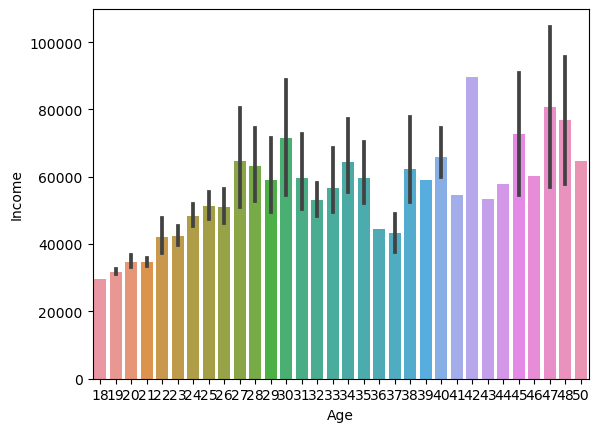

In [11]:
sns.barplot(x = "Age", y = "Income", data = df)

<Axes: xlabel='Gender', ylabel='count'>

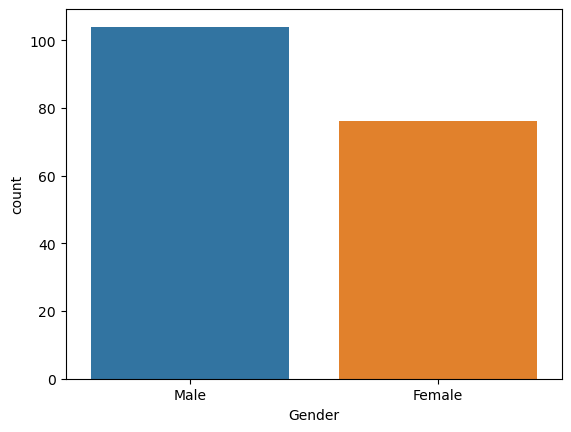

In [12]:
sns.countplot(x = "Gender", data = df)

In [13]:
df['Age'].max()

50

In [14]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [15]:
df.groupby('Gender')["Age"].count()

Gender
Female     76
Male      104
Name: Age, dtype: int64

In [16]:
pd.crosstab(df['Age'], df['Fitness'] ).head()

Fitness,1,2,3,4,5
Age,,,,,
18,0,0,0,1,0
19,0,0,4,0,0
20,0,1,4,0,0
21,0,2,3,2,0
22,0,1,4,0,2


<Axes: xlabel='Education', ylabel='count'>

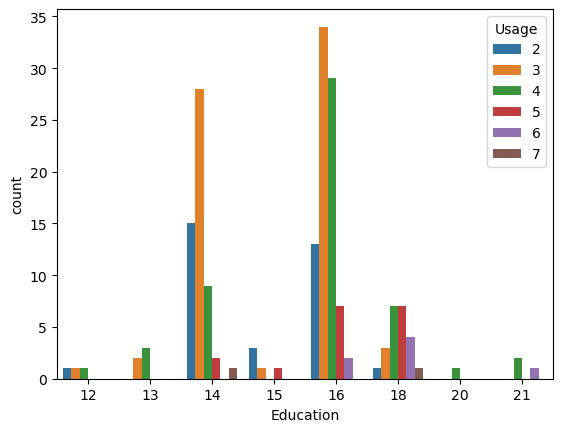

In [17]:
sns.countplot(x = "Education", hue = "Usage", data=df)

In [19]:
df.Age.describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64